<a href="https://colab.research.google.com/github/roshanappa/Anomaly-Detection-Techniques-/blob/master/Anomaly_Detection_In_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anomaly Detection :-**

Anomaly is nothing the but the abnormal data that showing any undesirable activities in the form of outliers.

e.g. Froud Detection.

When we talk about the anomaly or outliers we have two kind of anomaly.

**1.Global Outliers:-** It exist far outside of the entirity of the datasets.It completely away from the normal distribution of the data.It can be helpfull for the bussiness or may be malfunction of the IOT device or any error activity.

**2.Contexual outliers:-**This values exist in the global expectition but may appear anaomalus for seasonal data pattern or some pattern that are trends.

It looks completely inliner in time series data but when we take seasonal prospective or from the prospective of trend in your data.It may look like pretty anamulus.


Lets see....



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from download import download
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv'
path = 'C:/Users/Microsoft/Desktop'
df = download(url,path,replace=True)


file_sizes: 100%|████████████████████████████| 266k/266k [00:00<00:00, 4.95MB/s]
Successfully downloaded file to C:/Users/Microsoft/Desktop


In [97]:
data=pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [98]:
data.tail()

,timestamp,value
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591
10319,2015-01-31 23:30:00,26288


In [99]:
data['timestamp']=pd.to_datetime(data['timestamp'])

In [100]:
data.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [102]:
data.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


In [103]:
data.isnull().any()

timestamp    False
value        False
dtype: bool

In [104]:
data = data.set_index('timestamp').resample('H').mean() #taken the data hourly not on 1/2 hourly

In [105]:
data.head()

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5


In [106]:
data1=data.reset_index()

In [107]:

fig = px.line(data1, x='timestamp', y='value', title='Time Series with demand Distribution along the date')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1year", step="year", stepmode="backward"),
            dict(count=2, label="2year", step="year", stepmode="backward"),
            dict(count=3, label="3year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

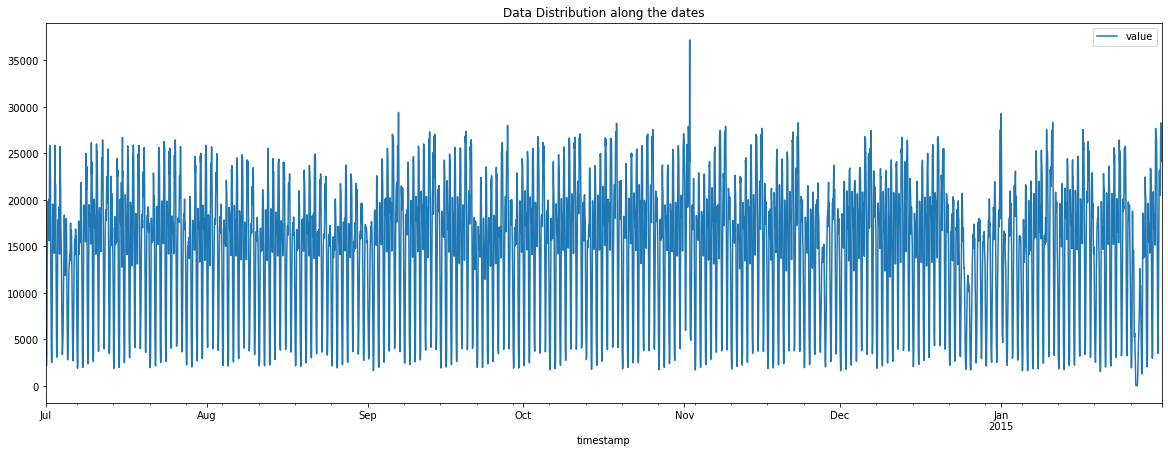

In [108]:
data.plot(figsize=(20,7),title='Data Distribution along the dates')
plt.show()

Here we can see there are some outliers also avalible in the seasonal pattern but we can not say them as an outliers by visual.

## Model Building.

In [109]:
from fbprophet import Prophet

In [110]:
data1.columns = ['ds','y']

In [111]:
train_data = data1[((data1['ds'] >='2014-07-01') & (data1['ds']<='2015-01-27'))]

In [112]:
test_data = data1[(data1['ds']>'2015-01-27')]

In [113]:
train_data.shape

(5041, 2)

In [114]:
test_data.shape

(119, 2)

In [115]:
model = Prophet(changepoint_range=0.95) #changepoint_range is consider as confidence interval of the output.

In [116]:
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [117]:
future_dates = model.make_future_dataframe(periods=200,freq='H')

In [118]:
y_predict = model.predict(future_dates)

In [119]:
y_predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-07-01 00:00:00,13228.339092,8773.337339,17905.686130
1,2014-07-01 01:00:00,10220.194393,5399.748024,15217.523314
2,2014-07-01 02:00:00,6656.895387,1866.777022,11176.383549
3,2014-07-01 03:00:00,3435.918478,-1507.665936,8303.048735
4,2014-07-01 04:00:00,2005.330278,-2593.168723,7005.706065


In [120]:
result = y_predict[['ds','yhat','yhat_lower','yhat_upper']]

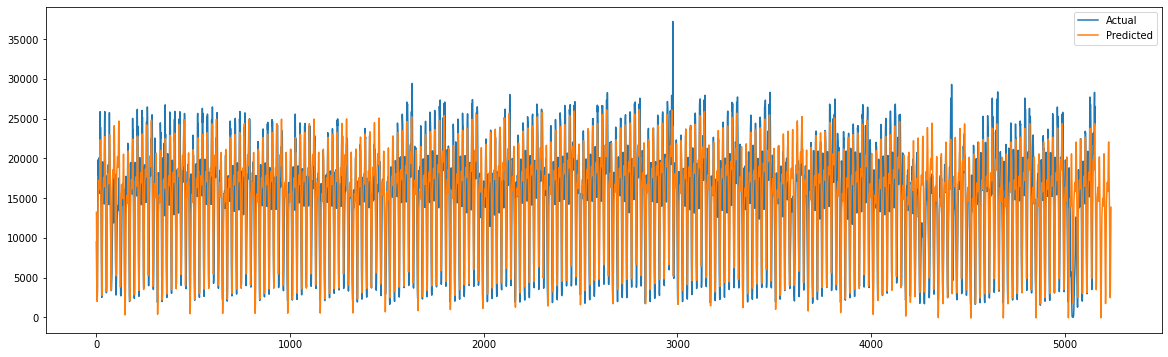

In [121]:
dataframe = pd.concat([data1['y'],y_predict['yhat']],axis=1)
dataframe.columns = ['Actual','Predicted']
dataframe.plot(figsize=(20,6))
plt.show()

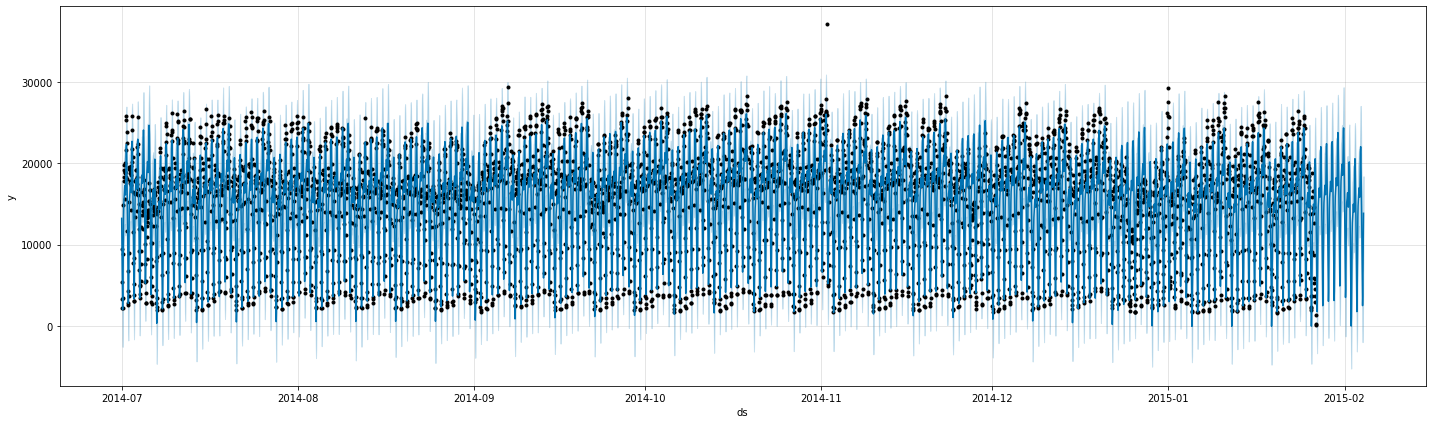

In [122]:
model.plot(y_predict,figsize=(20,6))
plt.show()

Here we can see the model blues are presenting themself as predicted and black points are presented as real datapoints.

In the case we can see the data having the outliers somewhere and somewhere due to seasonality the outliers are predictable.

even we have use use our 95 Confidence interval.

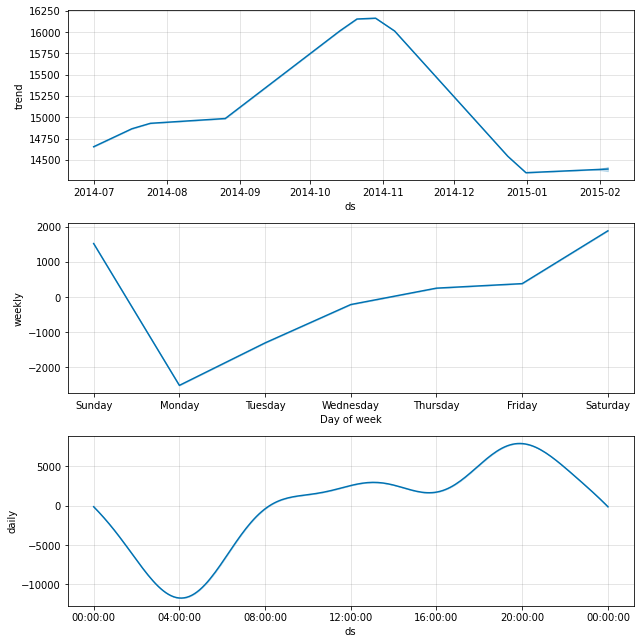

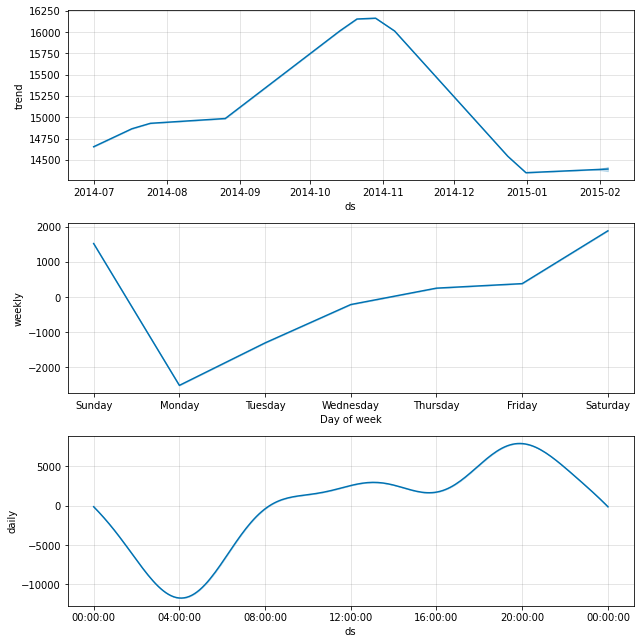

In [123]:
model.plot_components(y_predict)

In [124]:
dataframe

,Actual,Predicted
0,9485.5,13228.339092
1,5433.0,10220.194393
2,3346.5,6656.895387
3,2216.5,3435.918478
4,2189.5,2005.330278
...,...,...
5236,NaN,2481.481347
5237,NaN,3660.095978
5238,NaN,7032.150165
5239,NaN,10962.409329


In [125]:
dataframe = pd.concat([dataframe,y_predict[['yhat_lower','yhat_upper','ds']]],axis=1)

In [126]:
dataframe = dataframe.set_index('ds')

In [127]:
dataframe.head()

,Actual,Predicted,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13228.339092,8773.337339,17905.686130
2014-07-01 01:00:00,5433.0,10220.194393,5399.748024,15217.523314
2014-07-01 02:00:00,3346.5,6656.895387,1866.777022,11176.383549
2014-07-01 03:00:00,2216.5,3435.918478,-1507.665936,8303.048735
2014-07-01 04:00:00,2189.5,2005.330278,-2593.168723,7005.706065


In [128]:
dataframe['Error'] = dataframe['Actual'] - dataframe['Predicted']

In [129]:
dataframe['Uncertainty'] = dataframe['yhat_upper']-dataframe['yhat_lower']

In [130]:
dataframe.head()

,Actual,Predicted,yhat_lower,yhat_upper,Error,Uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13228.339092,8773.337339,17905.686130,-3742.839092,9132.348791
2014-07-01 01:00:00,5433.0,10220.194393,5399.748024,15217.523314,-4787.194393,9817.775290
2014-07-01 02:00:00,3346.5,6656.895387,1866.777022,11176.383549,-3310.395387,9309.606527
2014-07-01 03:00:00,2216.5,3435.918478,-1507.665936,8303.048735,-1219.418478,9810.714670
2014-07-01 04:00:00,2189.5,2005.330278,-2593.168723,7005.706065,184.169722,9598.874788


In [131]:
Outliers = dataframe[dataframe['Error'].abs() > 1.5*dataframe['Uncertainty']]
Outliers

,Actual,Predicted,yhat_lower,yhat_upper,Error,Uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14215.495541,9224.940817,18866.579726,22989.004459,9641.638909
2015-01-01 01:00:00,29292.0,11402.685988,6506.595221,16253.671770,17889.314012,9747.076548
2015-01-01 02:00:00,25753.5,7767.243272,2682.649082,12324.035460,17986.256728,9641.386378
2015-01-01 03:00:00,22067.0,4476.113854,-158.835391,9015.024904,17590.886146,9173.860295
2015-01-26 19:00:00,4565.5,19788.034941,14850.358994,24521.720623,-15222.534941,9671.361630
2015-01-26 20:00:00,3630.5,20563.358247,16142.215410,25635.751536,-16932.858247,9493.536126
2015-01-26 21:00:00,2907.0,19664.535017,14762.060140,24444.340463,-16757.535017,9682.280323
2015-01-26 22:00:00,1324.5,17708.853168,13047.282389,22440.904550,-16384.353168,9393.622162
2015-01-26 23:00:00,243.0,15428.310469,10947.523904,19962.687225,-15185.310469,9015.163321


Here we have choosen weightage value of 1.5 but we can choose any value according to bussiness knowleage.

We are chacking the absolue values of the error willl greater than uncertainty that time we will say these are our outliers.

In [132]:
dataframe['Anomaly'] = dataframe.apply(lambda x:'Yes' if(np.abs(x['Error']) > 1.5*x['Uncertainty']) else 'No',axis=1) 

In [133]:
dataframe.reset_index(inplace=True)

In [134]:

fig = px.scatter(dataframe, x='ds', y='Actual',color='Anomaly', title='Time Series with demand Distribution along the date anomly detection.')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1year", step="year", stepmode="backward"),
            dict(count=2, label="2year", step="year", stepmode="backward"),
            dict(count=3, label="3year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

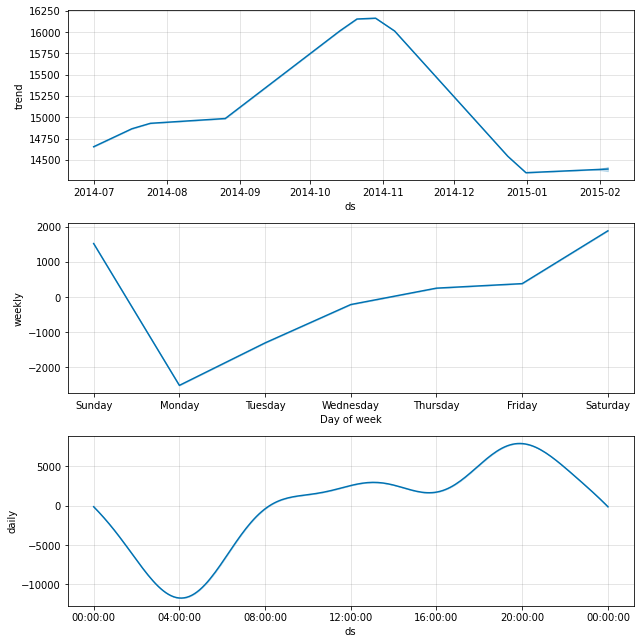

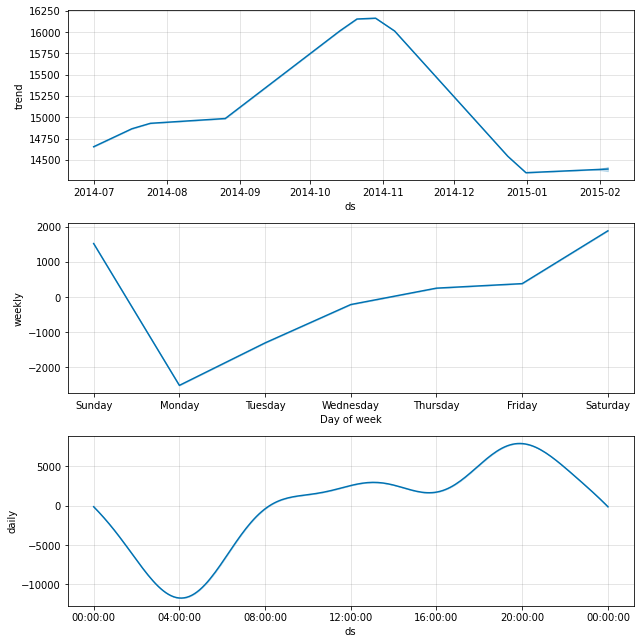

In [135]:
model.plot_components(y_predict)

From the above we can say that whichever the points are going below and above the normal distribution of data or according seasonality we call it them as an Outliers.

## Thank You !!